In [282]:
# Import packages/libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # to add nice background to the plots
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score # Sklearn package's randomized data splitting function
from sklearn import linear_model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn import datasets
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from uszipcode import SearchEngine
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

# to display graphs in Jupyter notebook
%matplotlib inline       
#from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind# Load and Explore the Data

# Load and Explore the Data

In [52]:
data = pd.read_csv("employee_promotion.csv")
df = data.copy()

In [53]:
df.shape

(54808, 13)

In [54]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

### Overview of Data

In [55]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000000,8,0,49.000000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000000,4,0,60.000000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000000,7,0,50.000000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000000,10,0,50.000000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000000,2,0,73.000000,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.000000,7,0,85.000000,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.000000,5,0,59.000000,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.000000,6,0,63.000000,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.000000,5,0,83.000000,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.000000,5,0,54.000000,0


In [56]:
df.tail(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54798,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.000000,4,0,51.000000,0
54799,68093,Procurement,region_2,Master's & above,f,other,1,50,5.000000,6,1,67.000000,0
54800,39227,HR,region_11,Bachelor's,m,other,2,34,5.000000,3,0,52.000000,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,78.000000,0
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.000000,2,0,49.000000,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000000,17,0,78.000000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000000,6,0,56.000000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000000,3,0,79.000000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000000,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000000,5,0,49.000000,0


### Check column types and missing values

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


### OBSERVATIONS:

* is_promoted is the dependent variable.
* change is_promoted data type to object

#### Change data type of is_promoted to object

In [60]:
df.is_promoted = df.is_promoted.astype(object)

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000000,39195.830627,22586.581449,1.000000,19669.750000,39225.500000,58730.500000,78298.000000
no_of_trainings,54808.000000,1.253011,0.609264,1.000000,1.000000,1.000000,1.000000,10.000000
age,54808.000000,34.803915,7.660169,20.000000,29.000000,33.000000,39.000000,60.000000
previous_year_rating,50684.000000,3.329256,1.259993,1.000000,3.000000,3.000000,4.000000,5.000000
length_of_service,54808.000000,5.865512,4.265094,1.000000,3.000000,5.000000,7.000000,37.000000
awards_won,54808.000000,0.023172,0.150450,0.000000,0.000000,0.000000,0.000000,1.000000
avg_training_score,52248.000000,63.712238,13.521910,39.000000,51.000000,60.000000,77.000000,99.000000


In [62]:
df.describe(include=['object']).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446
is_promoted,54808,2,0,50140


In [63]:
for i in df.describe(include='all').columns:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in employee_id are :
4098     1
60919    1
36347    1
48637    1
44543    1
        ..
15122    1
789      1
6934     1
4887     1
2047     1
Name: employee_id, Length: 54808, dtype: int64
**************************************************
Unique values in department are :
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
**************************************************
Unique values in region are :
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      

### Check column with null values

In [64]:
df.isnull().sum().sort_values(ascending = False)

previous_year_rating    4124
avg_training_score      2560
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
awards_won                 0
is_promoted                0
dtype: int64

### OBSERVATIONS:

* previous_year_rating, avg_training_score and education have missing values.

### Summary of dataset

In [65]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


In [66]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [67]:
df.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
9         5
10        5
Name: no_of_trainings, dtype: int64

In [68]:
df.awards_won.value_counts()

0    53538
1     1270
Name: awards_won, dtype: int64

### OBSERVATIONS:

* total no of rows is 54808
* total no of columns is 13
* dependent variable is is_promoted
* 91.5% of the customers belong to the negative class (customers who didnt get promoted). Disbalanced data.
* 70.2% of the employees are men
* 67% of the employees have a Bachelpr's degree.
* 30.7% of the employees belong to the Sales & Marketing department.
* there are a total of 34 regions.
* 22.52% of the employees belong to region 2
* the average length of service of employees 5.9 years with a std of 4.3 years.
* the average age of the employees is 34.8 years with a std of 7.7 years.
* 75% of the eomployees are 39 or younger
* 50% of employees have a rating of 3 or less.
* 50% of the employees have been working here for more than 5 years.
* on average employees have done 1.25 trainings with a std of 0.6
* 81% of employees have done only 1 training.
* mean of avg_training_score of employees is 63.71 with std of 13.52
* Only 2.3% of employees won an award
* previous_year_rating, avg_training_score and education have missing values.


In [69]:
# drop employee_id

df.drop(['employee_id'], axis=1, inplace = True)

In [70]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000000,8,0,49.000000,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.000000,4,0,60.000000,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000000,7,0,50.000000,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000000,10,0,50.000000,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.000000,2,0,73.000000,0


## EDA numerical data

### Univariate Analysis - Numerical

In [71]:
pd.set_option('display.float_format', lambda x: '%3f' %x)  #to display numbers in digits

In [72]:
# function to plot boxplot and histogram of variable

def histo_box(data,figsize=(15,10), bins =None):
    
    f,(ax_box,ax_hist) = plt.subplots(2,sharex=True, gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize )
    
    sns.boxplot(data,ax = ax_box, showmeans=True, color='violet') #plot a boxplot of data with a green triangle marking the mean value 

    
    sns.distplot(data,ax = ax_hist)      # plot histogram of data
    ax_hist.axvline(np.mean(data),color = 'green', linestyle = '--')
    ax_hist.axvline(np.median(data),color = 'black', linestyle = '-')
    plt.show()
 #   sns.violinplot(data, ax = ax_violin, showmeans = True)              # violin plot of data
    

In [80]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

####  age

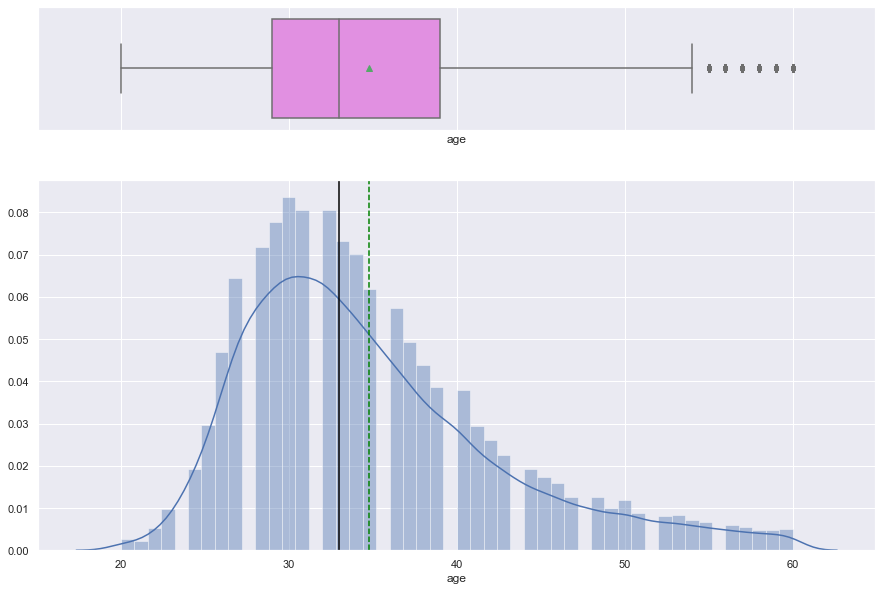

In [99]:
#see distribution for previous_year_rating

histo_box(df['age'])

####   OBSERVATIONS:
* age has outliers on the upper end. Some employees are much older than others.
* age is right skewed

#### no_of_trainings

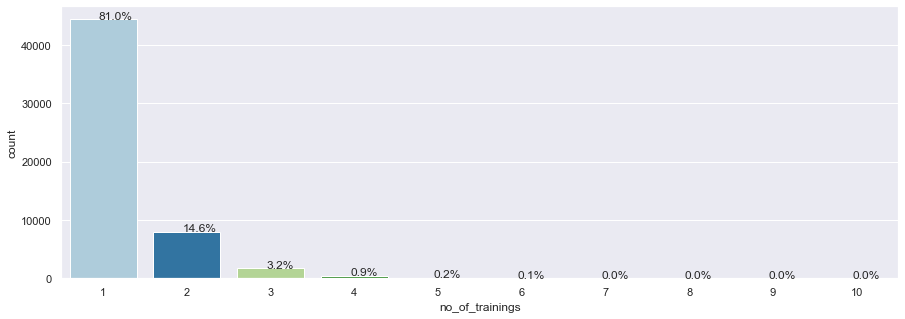

In [102]:
#see distribution for previous_year_rating

perc_on_bar('no_of_trainings')

####   OBSERVATIONS:
* 81% of employees have had 1 training
* only 4.4% of employees have had more than 2 trainings.

#### previous_year_rating

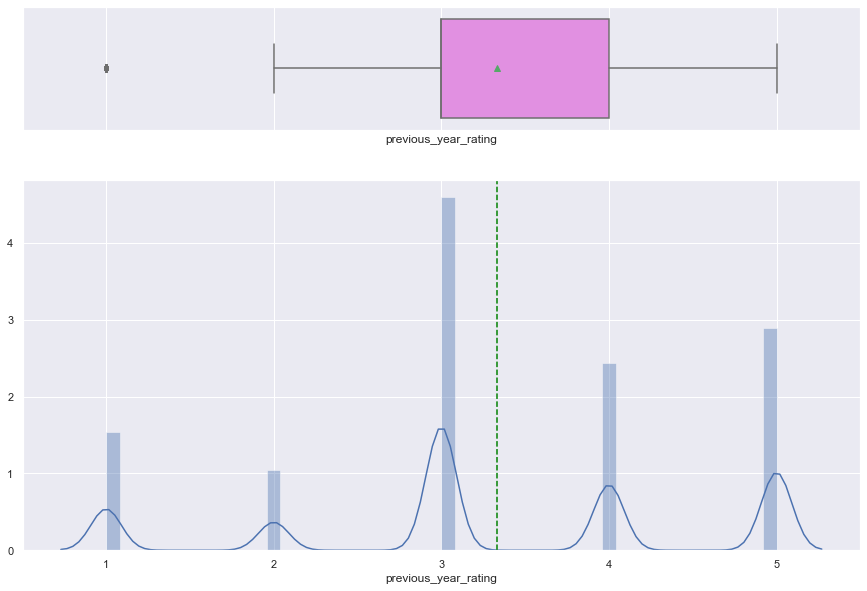

In [74]:
#see distribution for previous_year_rating

histo_box(df['previous_year_rating'])

#### Change data type of previous_year_rating to object

In [86]:
df.previous_year_rating = df.previous_year_rating.astype(object)

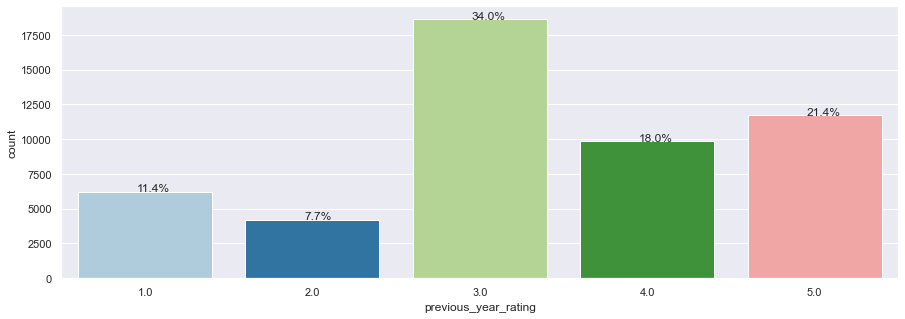

In [81]:
perc_on_bar('previous_year_rating')

####   OBSERVATIONS:
* previous_year_rating has outliers in the lower end.
* 73.4% of the employees had a rating of 3 or more
* only 19.1% of employees had a rating of less than 3

#### length_of_service

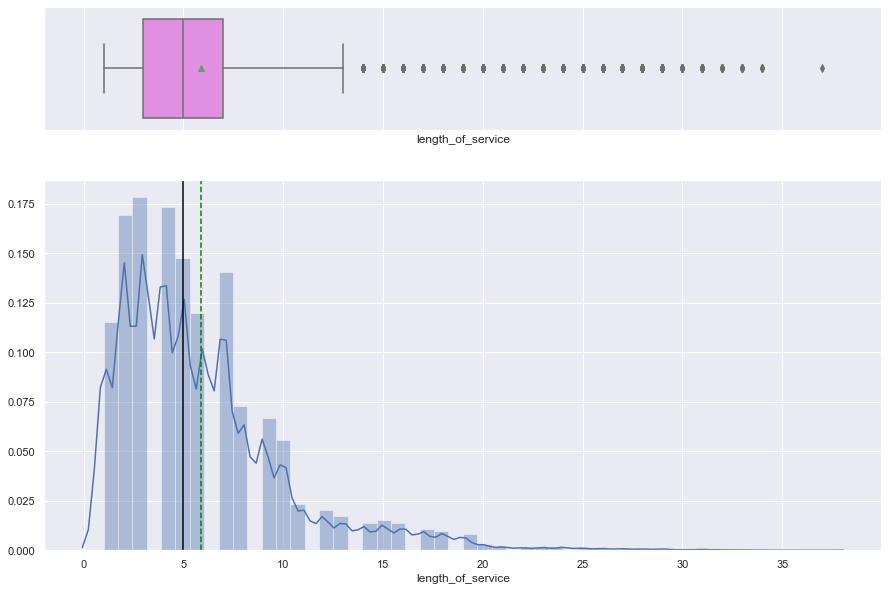

In [82]:
#see distribution for length_of_service

histo_box(df['length_of_service'])

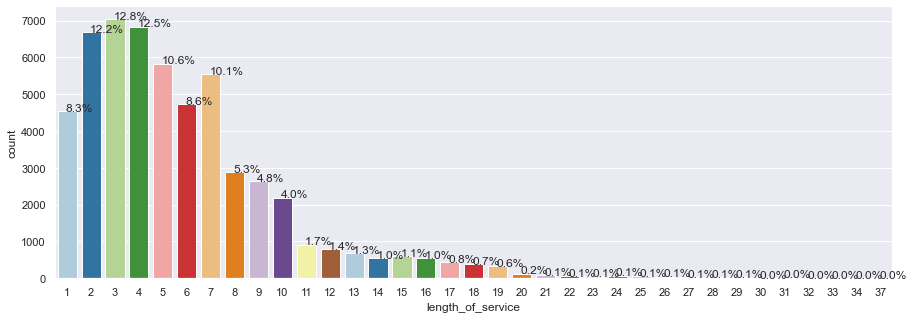

In [83]:
perc_on_bar('length_of_service')

####   OBSERVATIONS:
* length_of_service has a lot of outliers on upper end.
* length_of_service is right skewed, as some employees have been there for many years.

#### avg_training_score

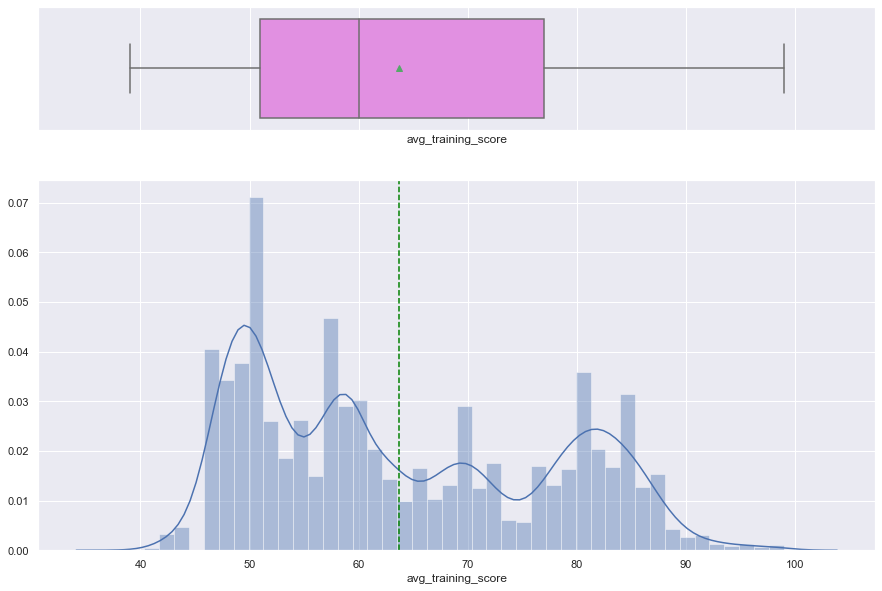

In [88]:
#see distribution for avg_training_score

histo_box(df['avg_training_score'])

####   OBSERVATIONS:

* avg_training_score has no outliers.
* avg_training_score is right skewed.

## EDA Categorical Data

### Univariate Analysis - Categorical

In [95]:
df.head().T

,0,1,2,3,4
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
previous_year_rating,5.0,5.0,3.0,1.0,3.0
length_of_service,8,4,7,10,2
awards_won,0,0,0,0,0


#### is_promoted

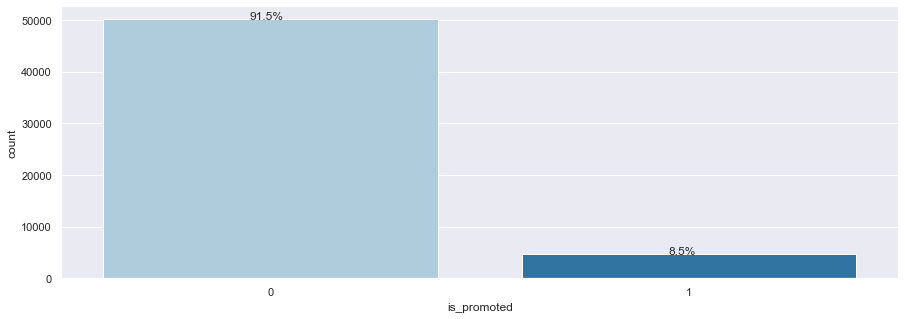

In [114]:
#is_promoted

perc_on_bar('is_promoted')

####   OBSERVATIONS:

* Only 8.5% of employees were promoted last year


#### awards_won

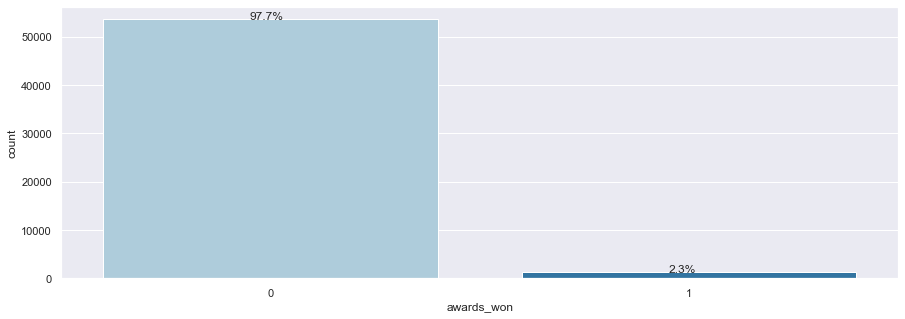

In [87]:
perc_on_bar('awards_won')

####   OBSERVATIONS:

* only 2.3% of employees have won awards

#### department

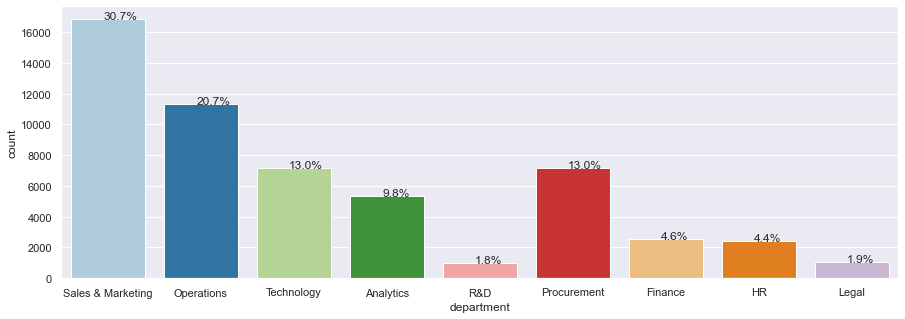

In [98]:
#department

perc_on_bar('department')

####   OBSERVATIONS:

* Sales and marketing has the most employees at 30.7%

#### gender

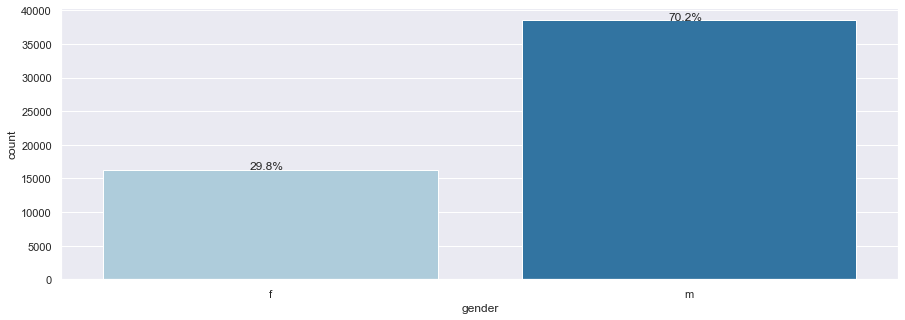

In [103]:
#Gender

perc_on_bar('gender')


####   OBSERVATIONS:

* 70.2% of the customers are male

#### region

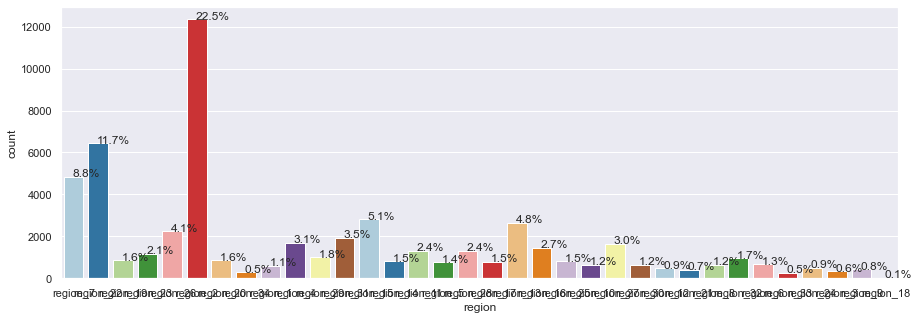

In [110]:
#region

perc_on_bar('region')


####   OBSERVATIONS:

* 22.5% of the employees are from region 2


#### education

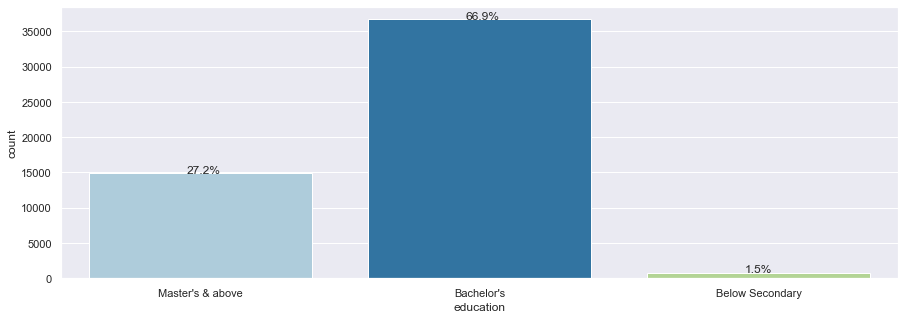

In [111]:
#education

perc_on_bar('education')


####   OBSERVATIONS:

* 66.9% of the employees have a Bachelor's degree
* only 1.5% of the employees have education below secondary


#### recruitment_channel

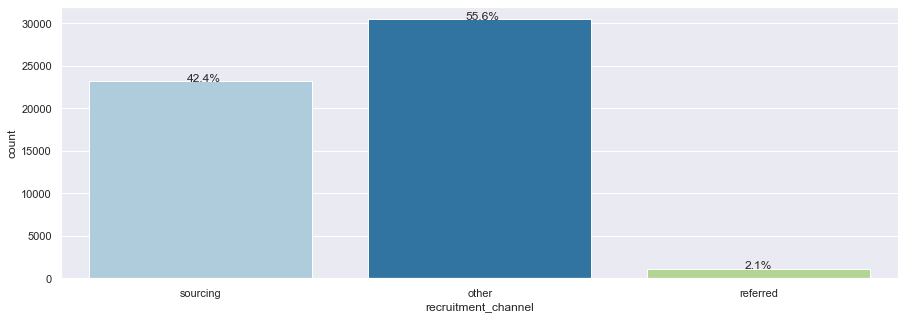

In [112]:
#recruitment_channel

perc_on_bar('recruitment_channel')


####   OBSERVATIONS:

* 55.6% of the employees were recruited through 'other' channels
* 42.4% of the employees were recruited through sourcing


## EDA BiVariate analysis

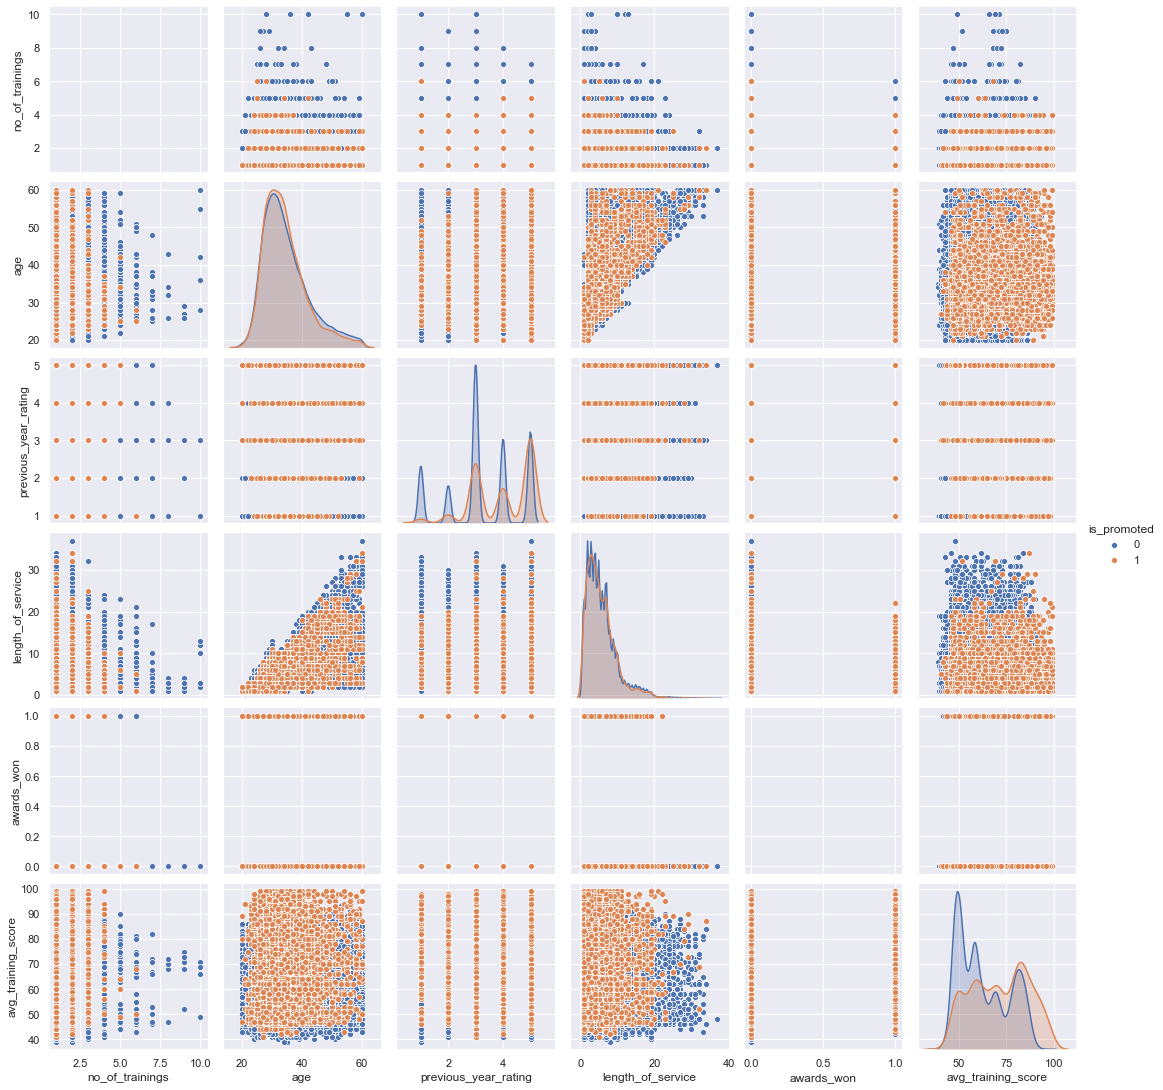

In [115]:
# Pairplot of all variables

sns.pairplot(data=df, hue = 'is_promoted')
plt.show()

####   OBSERVATIONS:

* employees with shorter length of service are promoted more, as older employees have plateaued in their progress.
* employees with higher number of  trainings does not necessarily guarantee promotion.


### CORREALTION MATRIX OF NUMERICAL VARIABLES

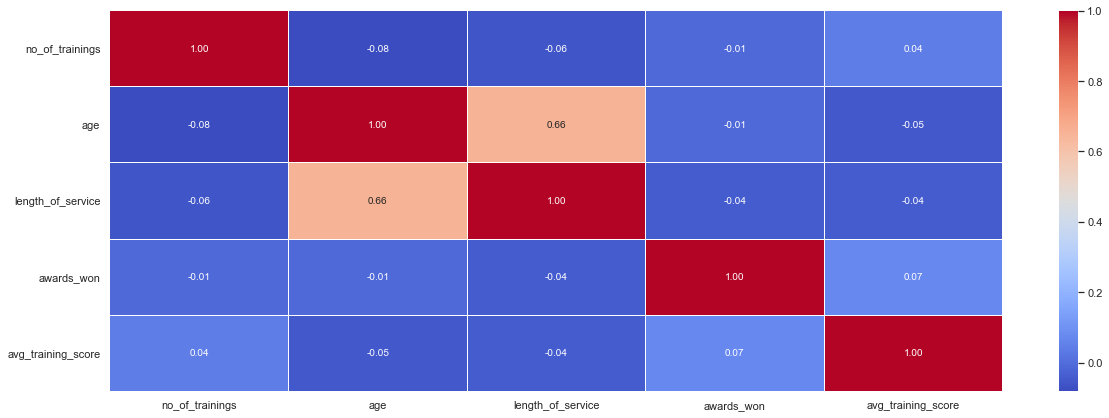

In [117]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), annot=True, linewidths = 0.05, fmt = '.2f', cmap="coolwarm") 


####   OBSERVATIONS:

* length_of_service and age have have a positive correlation
* 


### is_promoted vs age vs gender

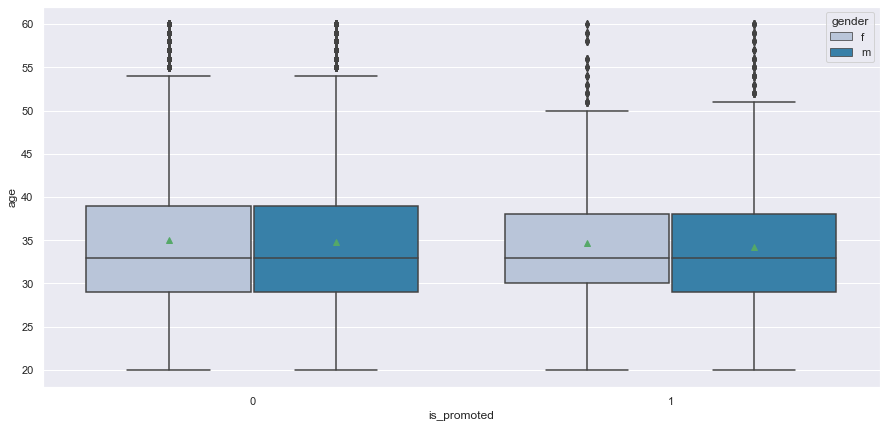

In [118]:
plt.figure(figsize=(15,7))
sns.boxplot(df["is_promoted"],df["age"],hue = df["gender"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:

* Gender doesn't seem to affect promotion of the employee
* 75% of employees who got promoted were under 40 years of age

### is_promoted vs length_of_service vs recruitment_channel

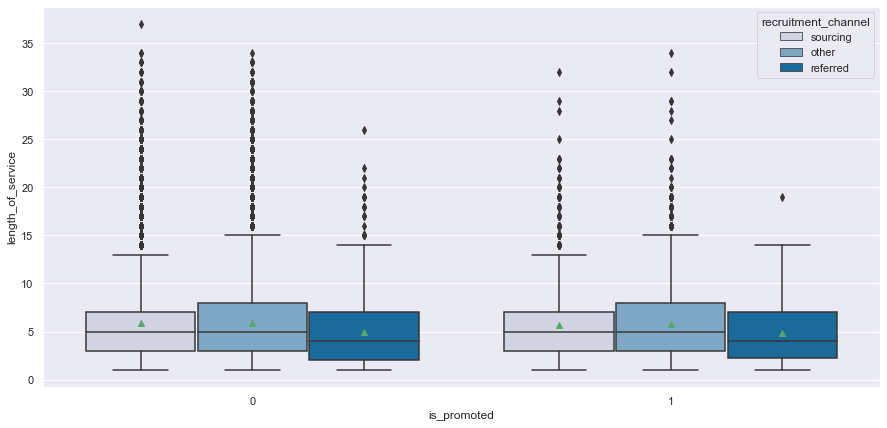

In [121]:
plt.figure(figsize=(15,7))
sns.boxplot(df["is_promoted"],df["length_of_service"],hue = df["recruitment_channel"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:

* length of service and recruitment_channel don't seem to affect the promotion of the employee

### is_promoted vs previous_year_rating vs awards_won

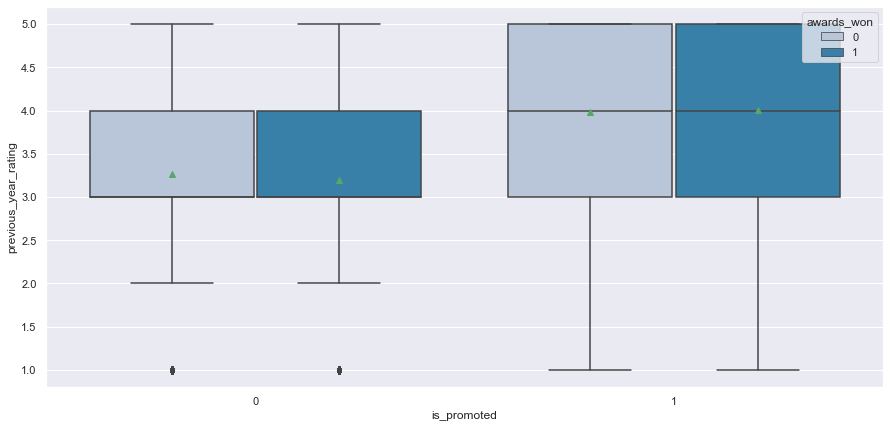

In [127]:
plt.figure(figsize=(15,7))
sns.boxplot(df["is_promoted"],df["previous_year_rating"],hue = df["awards_won"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:

* Employees with a higher rating in previous year were promoted more.
* winning awards did not increase promotion chances.

In [129]:
### Function to plot stacked bar charts for categorical columns
def stacked_bar_chart(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['is_promoted'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['is_promoted'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### is_promoted vs gender

is_promoted      0     1    All
gender                         
f            14845  1467  16312
m            35295  3201  38496
All          50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


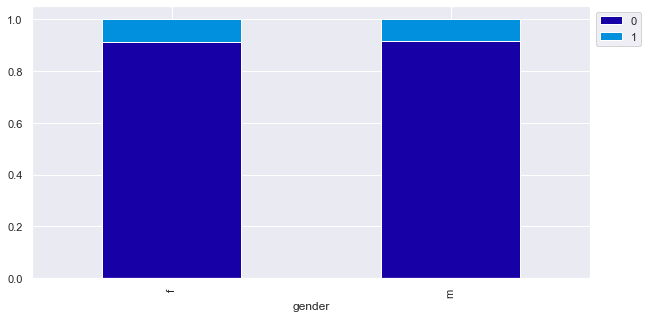

In [130]:
stacked_bar_chart(df['gender'])

####   OBSERVATIONS:

* Gender does not affect promotion.

### is_promoted vs age

is_promoted      0     1    All
age                            
20             109     4    113
21              93     5     98
22             213    18    231
23             394    34    428
24             775    70    845
25            1230    69   1299
26            1897   163   2060
27            2566   261   2827
28            2839   308   3147
29            3111   294   3405
30            3341   324   3665
31            3224   310   3534
32            3237   297   3534
33            2891   319   3210
34            2790   286   3076
35            2428   283   2711
36            2309   208   2517
37            1981   184   2165
38            1739   184   1923
39            1534   161   1695
40            1536   127   1663
41            1185   104   1289
42            1058    91   1149
43             915    77    992
44             777    70    847
45             712    48    760
46             654    43    697
47             530    27    557
48             513    44    557
49      

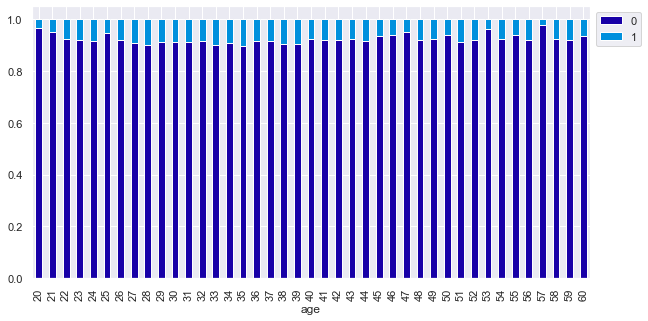

In [131]:
stacked_bar_chart(df['age'])

####   OBSERVATIONS:

* employees in 30s have higher chances of promotion

### is_promoted vs previous_year_rating

is_promoted               0     1    All
previous_year_rating                    
1.0                    6135    88   6223
2.0                    4044   181   4225
3.0                   17263  1355  18618
4.0                    9093   784   9877
5.0                    9820  1921  11741
All                   46355  4329  50684
------------------------------------------------------------------------------------------------------------------------


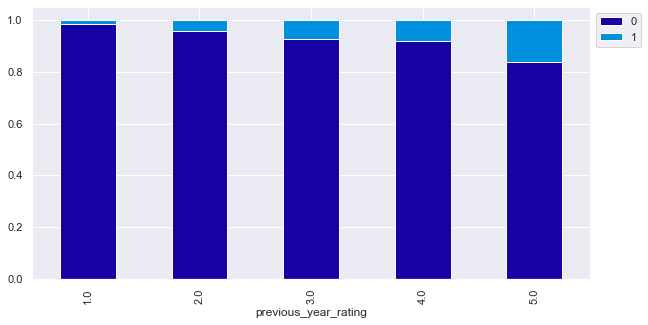

In [145]:
stacked_bar_chart(df['previous_year_rating'])

####   OBSERVATIONS:

* Higher rating increases chances of promotion

### is_promoted vs no_of_trainings

is_promoted          0     1    All
no_of_trainings                    
1                40468  3910  44378
2                 7382   605   7987
3                 1654   122   1776
4                  442    26    468
5                  125     3    128
6                   42     2     44
7                   12     0     12
8                    5     0      5
9                    5     0      5
10                   5     0      5
All              50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


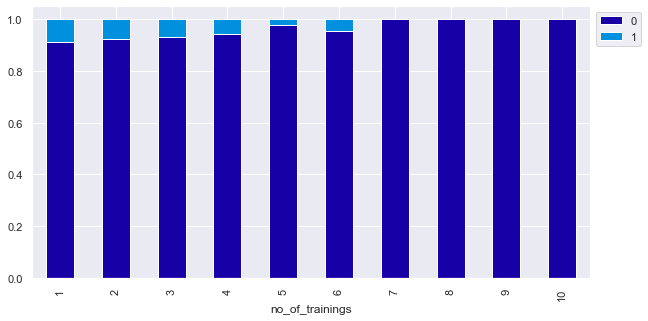

In [133]:
stacked_bar_chart(df['no_of_trainings'])

####   OBSERVATIONS:

* higher no of trainings do not increase chances of promotion


### is_promoted vs length_of_service

is_promoted            0     1    All
length_of_service                    
1                   4170   377   4547
2                   6089   595   6684
3                   6424   609   7033
4                   6238   598   6836
5                   5357   475   5832
6                   4333   401   4734
7                   5087   464   5551
8                   2614   269   2883
9                   2400   229   2629
10                  1989   204   2193
11                   820    96    916
12                   731    63    794
13                   633    54    687
14                   520    29    549
15                   550    43    593
16                   507    41    548
17                   406    26    432
18                   367    25    392
19                   297    32    329
20                   118    10    128
21                    74     4     78
22                    55     6     61
23                    58     7     65
24                    70     0     70
25          

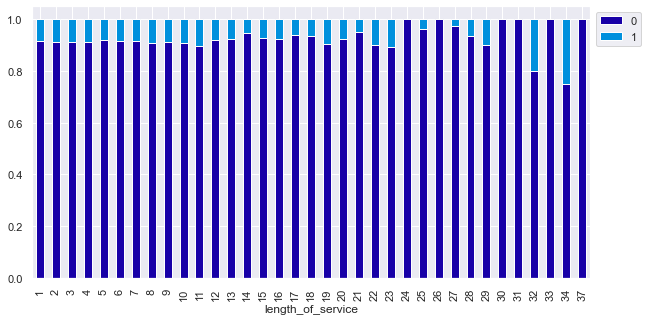

In [134]:
stacked_bar_chart(df['length_of_service'])

####   OBSERVATIONS:

* Fewer chances of promotion as length of service increases.

### is_promoted vs awards_won

is_promoted      0     1    All
awards_won                     
0            49429  4109  53538
1              711   559   1270
All          50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


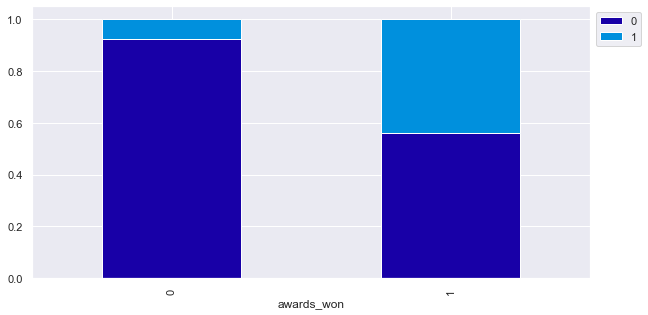

In [135]:
stacked_bar_chart(df['awards_won'])

####   OBSERVATIONS:

* winning an award increases chances of promotion

### is_promoted vs avg_training_score

is_promoted             0     1    All
avg_training_score                    
39.0                    2     0      2
40.0                    5     0      5
41.0                   25     1     26
42.0                   60     2     62
43.0                  169     7    176
44.0                  325    10    335
46.0                 1100    36   1136
47.0                 1667    79   1746
48.0                 2341    96   2437
49.0                 2581   100   2681
50.0                 2604   112   2716
51.0                 2244   103   2347
52.0                 1784    72   1856
53.0                 1280    44   1324
54.0                  948    49    997
55.0                  825    47    872
56.0                 1001    69   1070
57.0                 1355    82   1437
58.0                 1768   130   1898
59.0                 1919   145   2064
60.0                 2017   138   2155
62.0                 1333   117   1450
63.0                  927    94   1021
64.0                  627

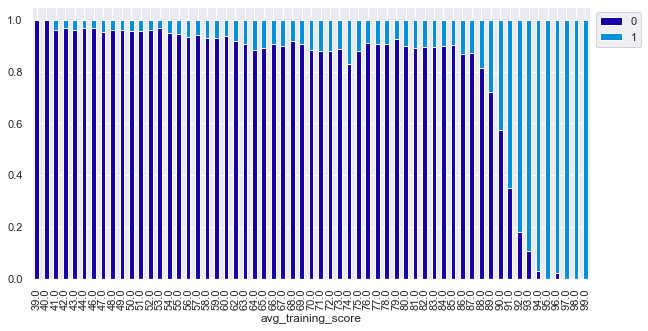

In [136]:
stacked_bar_chart(df['avg_training_score'])

####   OBSERVATIONS:

* higher training score significanlty increases chances of promotion

### is_promoted vs department

is_promoted            0     1    All
department                           
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
Legal                986    53   1039
Operations         10325  1023  11348
Procurement         6450   688   7138
R&D                  930    69    999
Sales & Marketing  15627  1213  16840
Technology          6370   768   7138
All                50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


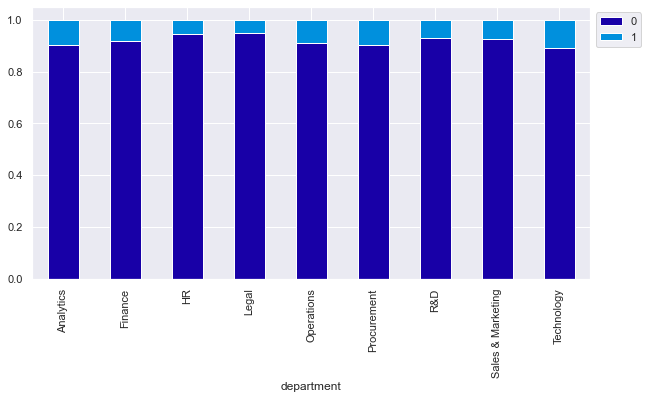

In [137]:
stacked_bar_chart(df['department'])

####   OBSERVATIONS:

* Technology department has the highest chance of promotion
* HR and Legal departments have the lowest proportion of promotions in all departments


### is_promoted vs region

is_promoted      0     1    All
region                         
region_1       552    58    610
region_10      597    51    648
region_11     1241    74   1315
region_12      467    33    500
region_13     2418   230   2648
region_14      765    62    827
region_15     2586   222   2808
region_16     1363   102   1465
region_17      687   109    796
region_18       30     1     31
region_19      821    53    874
region_2     11354   989  12343
region_20      801    49    850
region_21      393    18    411
region_22     5694   734   6428
region_23     1038   137   1175
region_24      490    18    508
region_25      716   103    819
region_26     2117   143   2260
region_27     1528   131   1659
region_28     1164   154   1318
region_29      951    43    994
region_3       309    37    346
region_30      598    59    657
region_31     1825   110   1935
region_32      905    40    945
region_33      259    10    269
region_34      284     8    292
region_4      1457   246   1703
region_5

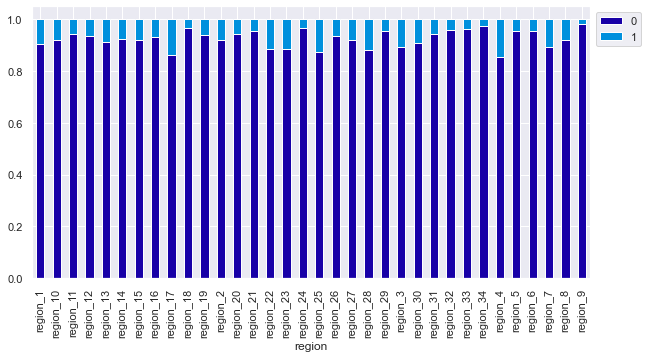

In [142]:
stacked_bar_chart(df['region'])

####   OBSERVATIONS:

* Region 4 had the highest percentage of promotions

### is_promoted vs education

is_promoted           0     1    All
education                           
Bachelor's        33661  3008  36669
Below Secondary     738    67    805
Master's & above  13454  1471  14925
All               47853  4546  52399
------------------------------------------------------------------------------------------------------------------------


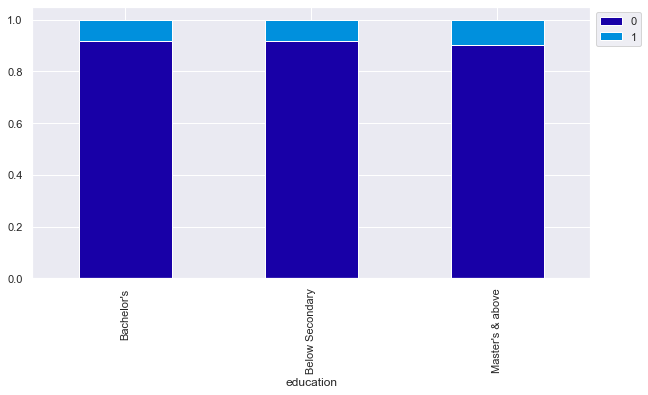

In [143]:
stacked_bar_chart(df['education'])

####   OBSERVATIONS:

* Master's and above education has a slightly higher chance of promotion than other educaiton levels.

### is_promoted vs recruitment_channel

is_promoted              0     1    All
recruitment_channel                    
other                27890  2556  30446
referred              1004   138   1142
sourcing             21246  1974  23220
All                  50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


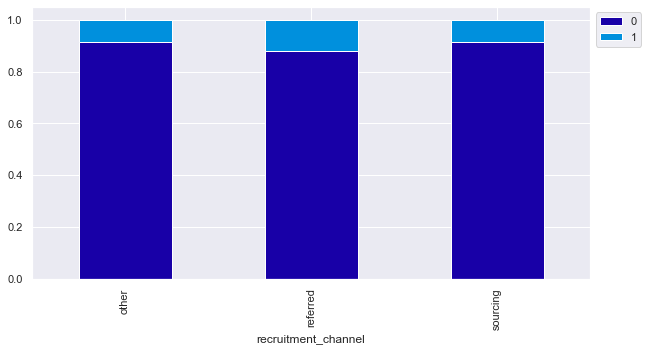

In [144]:
stacked_bar_chart(df['recruitment_channel'])

####   OBSERVATIONS:

* Employees hired through referral had a higher porportion of promotion.

## Data Preprocessing

### Missing-Value Treatment

* Will use KNN to fill the vales with Unknown in Education_Level, Marital_Status and Income_Category

In [146]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

### Find the percentage of outliers, in each column of the data, using IQR.

In [150]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [151]:
((df.select_dtypes(include=['float64','int64'])<lower) | (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df)*100

age                     2.618231
avg_training_score      0.000000
awards_won              2.317180
employee_id             0.000000
is_promoted             0.000000
length_of_service       6.365859
no_of_trainings        19.030069
previous_year_rating    0.000000
dtype: float64

* We are choosing not to remove/treat outliers to reflect real life scenarios and data

In [152]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.000000,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.000000,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.000000,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.000000,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.000000,0


In [210]:
data1=data.copy()

In [211]:
data1['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [212]:
data1['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [213]:
# need numerical values for categorical columns for KNN imputation, will label encode them

gender_map = {'m':0,'f':1}
data1['gender'] = data1['gender'].map(gender_map).astype('Int32')


education_map= {"Below Secondary":0, "Bachelor's":1,"Master's & above":2}  
data1['education'] = data1['education'].map(education_map).astype('Int32')

recruitment_map = {'sourcing':0, 'referred':1,'other':2}
data1['recruitment_channel'] = data1['recruitment_channel'].map(recruitment_map).astype('Int32')

region_map = {'region_7':7, 'region_22':22, 'region_19':19, 'region_23':23, 'region_26':26,
       'region_2':2, 'region_20':20, 'region_34':34, 'region_1':1, 'region_4':4,
       'region_29':29, 'region_31':31, 'region_15':15, 'region_14':14, 'region_11':11,
       'region_5':5, 'region_28':28, 'region_17':17, 'region_13':13, 'region_16':16,
       'region_25':25, 'region_10':10, 'region_27':27, 'region_30':30, 'region_12':12,
       'region_21':21, 'region_8':8, 'region_32':32, 'region_6':6, 'region_33':33,
       'region_24':24, 'region_3':3, 'region_9':9, 'region_18':18} 
data1['region'] = data1['region'].map(region_map).astype('Int32')

department_map = {'Sales & Marketing':0,'Operations':1,'Technology':2,'Analytics':3,'R&D':4,'Procurement':5,'Finance':6,'HR':7,'Legal':8} 
data1['department'] = data1['department'].map(department_map).astype('Int32')

In [214]:
data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,0,7,2,1,0,1,35,5.000000,8,0,49.000000,0
1,65141,1,22,1,0,2,1,30,5.000000,4,0,60.000000,0
2,7513,0,19,1,0,0,1,34,3.000000,7,0,50.000000,0
3,2542,0,23,1,0,2,2,39,1.000000,10,0,50.000000,0
4,48945,2,26,1,0,2,1,45,3.000000,2,0,73.000000,0


In [215]:
data1.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

### Missing-Value Treatment

In [216]:
imputer = KNNImputer(n_neighbors=5)

In [217]:
X = data1.drop(['is_promoted'],axis=1)
y = data1['is_promoted']

In [218]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(38365, 12) (16443, 12)


In [219]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [220]:
#Checking that there are no missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


* missing values have been treated
* need to inverse map the encoded values

In [221]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [222]:
inverse_mapping(gender_map,'gender')
inverse_mapping(education_map,'education')
inverse_mapping(recruitment_map,'recruitment_channel')
inverse_mapping(region_map,'region')
inverse_mapping(department_map,'department')

#### Check inverse mapped values

In [223]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Sales & Marketing    11752
Operations            7979
Procurement           4996
Technology            4970
Analytics             3767
Finance               1813
HR                    1684
Legal                  706
R&D                    698
Name: department, dtype: int64
******************************
region_2     8612
region_22    4557
region_7     3410
region_15    1960
region_13    1849
region_26    1584
region_31    1351
region_27    1199
region_4     1186
region_16    1021
region_28     897
region_11     896
region_23     835
region_29     699
region_32     675
region_19     632
region_20     617
region_14     586
region_25     577
region_17     544
region_5      524
region_6      477
region_10     451
region_8      445
region_30     434
region_1      427
region_24     362
region_12     339
region_21     284
region_9      273
region_3      248
region_34     206
region_33     184
region_18      24
Name: region, dtype: int64
******************************
Bachelor's          27208

In [224]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Sales & Marketing    11752
Operations            7979
Procurement           4996
Technology            4970
Analytics             3767
Finance               1813
HR                    1684
Legal                  706
R&D                    698
Name: department, dtype: int64
******************************
region_2     8612
region_22    4557
region_7     3410
region_15    1960
region_13    1849
region_26    1584
region_31    1351
region_27    1199
region_4     1186
region_16    1021
region_28     897
region_11     896
region_23     835
region_29     699
region_32     675
region_19     632
region_20     617
region_14     586
region_25     577
region_17     544
region_5      524
region_6      477
region_10     451
region_8      445
region_30     434
region_1      427
region_24     362
region_12     339
region_21     284
region_9      273
region_3      248
region_34     206
region_33     184
region_18      24
Name: region, dtype: int64
******************************
Bachelor's          27208

### Encode categorical values

In [227]:
X_train.shape

(38365, 12)

In [228]:
X_test.shape

(16443, 12)

In [229]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(38365, 53) (16443, 53)


#### After encoding there are 53 columns

## Building the model

## Model evaluation criterion

* Negative Class : ineligible for promotion
* Positive Class : eligible for promotion

### Wrong predictions by Model can be:

1. Predicting an employee is eligible for promotion but they are not, which is FP
2. Predicting an employee is ineligible for promotion but they actually are, which is FN

### Which case is more important? 

* Predicting an employee is eligibe for promotion when they are not (FP) because if an ineligible employee is promoted then the company will suffer because the performance of that employee will not be up to standard.

### To reduce this loss we need to minimize False Positives

* The company wants to minimize FP so that only capable people advance in the company and that will benefit the company most.

### We want to maximize Precision by minimizing False Positives




**Define function to provide accuracy, recall and precision on the train and test set and to show confusion matrix**

In [231]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [232]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [241]:
X_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,18266.000000,2.000000,24.000000,1.600000,1.000000,0.000000,48.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,68976.000000,1.000000,38.000000,5.000000,3.000000,0.000000,51.000000,0,1,0,...,0,0,0,0,0,0,1,1,0,1
2,6438.000000,1.000000,25.000000,3.000000,3.000000,0.000000,49.000000,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,18049.000000,1.000000,36.000000,2.000000,9.000000,0.000000,71.000000,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,65316.000000,1.000000,37.000000,3.000000,3.000000,0.000000,59.600000,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Logistic Regression 

In [249]:
lr = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

lr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.0s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

**evaluate the model performance by using KFold and cross_val_score**


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   27.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   46.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   27.9s finished


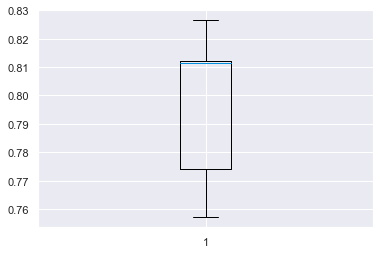

In [250]:
scoring='precision'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.755 to 0.825 precision.
* check the performance on test data.

Accuracy on training set :  0.9278769711977063
Accuracy on test set :  0.9286018366478137
Recall on training set :  0.20746634026927785
Recall on test set :  0.22142857142857142
Precision on training set :  0.7929824561403509
Precision on test set :  0.7868020304568528


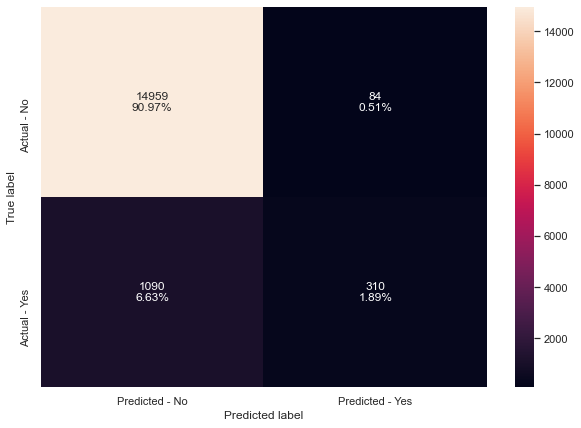

In [251]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

#### Observation
* Logistic Regression has given a generalized performance on training and test set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [252]:
from imblearn.over_sampling import SMOTE

In [253]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 3268
Before UpSampling, counts of label 'No': 35097 

After UpSampling, counts of label 'Yes': 35097
After UpSampling, counts of label 'No': 35097 

After UpSampling, the shape of train_X: (70194, 53)
After UpSampling, the shape of train_y: (70194,) 



### Logistic Regression on oversampled data

In [254]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**evaluate the model performance by using KFold and cross_val_score**


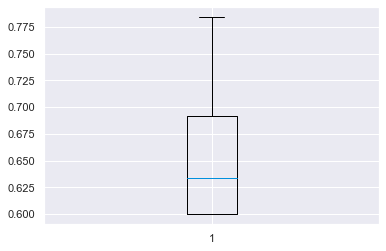

In [255]:
scoring='precision'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.6 to 0.79, which is worse than the previous model


Accuracy on training set :  0.7879448385901929
Accuracy on test set :  0.762269658821383
Recall on training set :  0.7792973758440892
Recall on test set :  0.34214285714285714
Precision on training set :  0.7930124673818498
Precision on test set :  0.1381597923276608


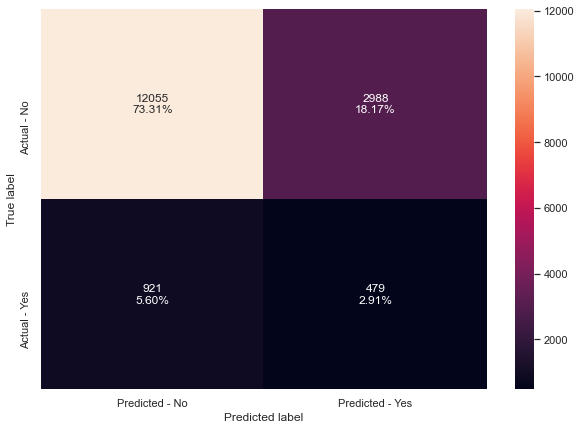

In [256]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Model is overfitting
* performance did not improve by overfitting
* value of precision on test data dropped significantly.
* try regularization to reduce overfitting


### Regularization

In [260]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.5460153289454939
Accuracy on test set :  0.4205436964057654
Recall on training set :  0.7059862666324757
Recall on test set :  0.6985714285714286
Precision on training set :  0.5348616327764106
Precision on test set :  0.09698532328441095


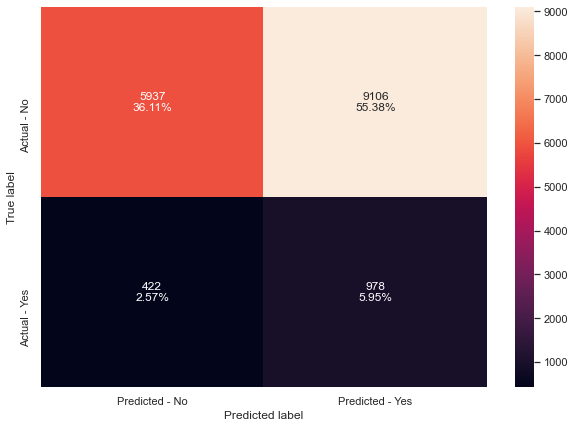

In [264]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* After regularization, overfitting has reduced but the precision has also reduced.
* Let's try undersampling now.

### Undersampling train data using SMOTE

In [265]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [266]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 3268
Before Under Sampling, counts of label 'No': 35097 

After Under Sampling, counts of label 'Yes': 3268
After Under Sampling, counts of label 'No': 3268 

After Under Sampling, the shape of train_X: (6536, 53)
After Under Sampling, the shape of train_y: (6536,) 



### Logistic Regression on undersampled data

In [267]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

**evaluate the model performance by using KFold and cross_val_score**


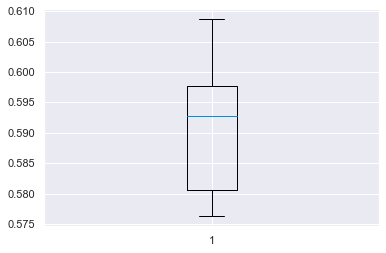

In [268]:
scoring='precision'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

*  Performance of model on training set varies between 0.57 to 0.608, which is worse than the initial model


#### Performance on test data

Accuracy on training set :  0.6392288861689106
Accuracy on test set :  0.6255549473940278
Recall on training set :  0.6756425948592412
Recall on test set :  0.6828571428571428
Precision on training set :  0.6297775242441529
Precision on test set :  0.1433498275603539


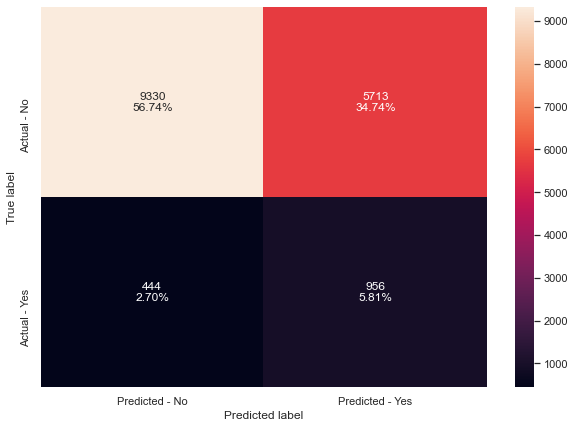

In [270]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

#### will proceed with original data as model perfomrance didnt get better after over and under sampling

### Bagging and Boosting

**build different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**


In [275]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1,)),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 30.41025791221759
Bagging: 67.42293771807931
RF: 83.72746456126127
ADB: 79.99619552196125
GBM: 85.21792327326247
XGB: 81.30726105403878


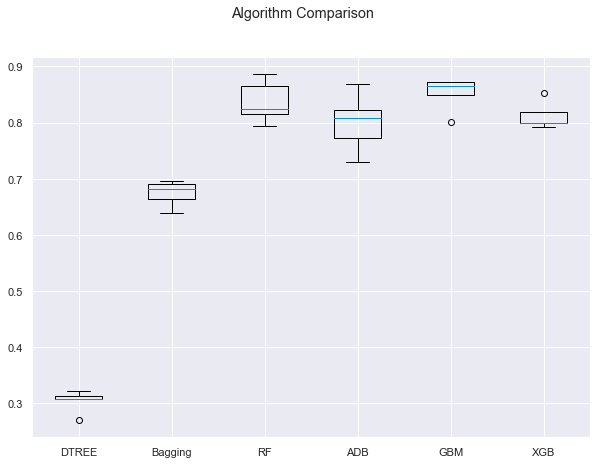

In [276]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax =  fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that GradientBoost is giving the highest cross validated precision followed by Random Forest.
- Tune the models see if the performance improves.

## Hyperparameter Tuning

* Use pipelines with StandardScaler with bagging and boosting models and tune them using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.

* We can also use make_pipeline function instead of Pipeline to create a pipeline.



### Hyperparameter tuning Decision Tree

#### GridSearchCV

In [278]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__max_leaf_nodes': 15, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 10} 
Score: 0.1756372611002618
CPU times: user 17min 48s, sys: 4min 31s, total: 22min 19s
Wall time: 22min 24s


In [279]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=7,
        max_leaf_nodes=15,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=10
    ),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=7, max_leaf_nodes=15,
                                        min_impurity_decrease=0.0001,
                                        min_samples_leaf=10, random_state=1))])

Accuracy on training set :  0.9266518962596116
Accuracy on test set :  0.9258042936203855
Recall on training set :  0.1762545899632803
Recall on test set :  0.1707142857142857
Precision on training set :  0.8252148997134671
Precision on test set :  0.802013422818792


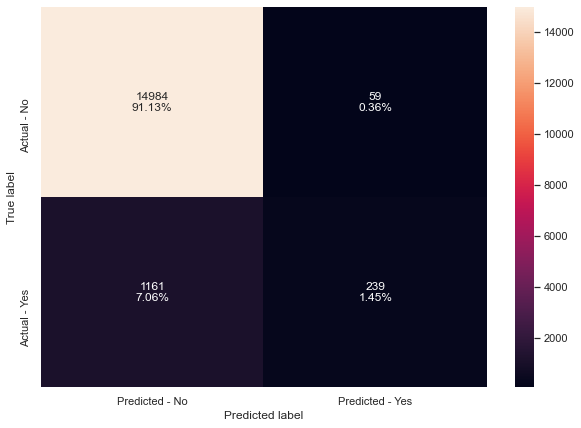

In [280]:
# Calculating different metrics
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- Precision has improved 
- The model is slightly overfitting the training data in terms of precision.

#### RandomizedSearchCV

In [286]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_impurity_decrease': 0.01, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__max_depth': 12} with CV score=0.8798672945609219:
CPU times: user 18.3 s, sys: 5 s, total: 23.3 s
Wall time: 23.4 s


In [284]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=12,
        max_leaf_nodes=10,
        random_state=1,
        min_impurity_decrease=0.01,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=12, max_leaf_nodes=10,
                                        min_impurity_decrease=0.01,
                                        random_state=1))])

Accuracy on training set :  0.9228202789000391
Accuracy on test set :  0.9227634859818767
Recall on training set :  0.10862913096695226
Recall on test set :  0.10928571428571429
Precision on training set :  0.8808933002481389
Precision on test set :  0.8693181818181818


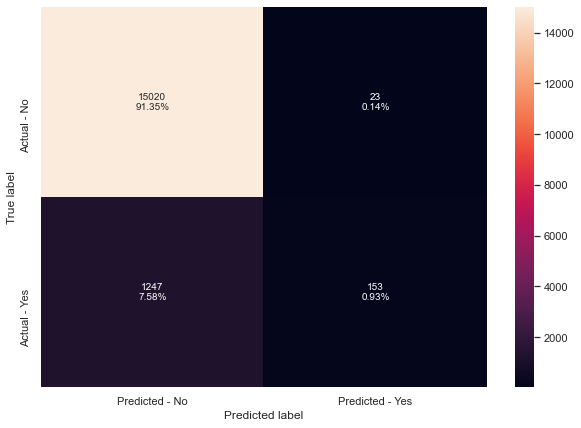

In [285]:
# Calculating different metrics
get_metrics_score(dtree_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

### Hyperparameter tuning BaggingClassifier

#### GridSearchCV

In [287]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.7, 'baggingclassifier__max_samples': 0.7, 'baggingclassifier__n_estimators': 50} 
Score: 0.9219342472358395
CPU times: user 14min 24s, sys: 26.5 s, total: 14min 50s
Wall time: 14min 58s


In [288]:
# Creating new pipeline with best parameters
bagg_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.7,
        max_samples=0.7,
        random_state=1,
        n_estimators=50,
    ),
)

# Fit the model on training data
bagg_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.7, max_samples=0.7,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.985611885833442
Accuracy on test set :  0.9282369397311926
Recall on training set :  0.8310893512851897
Recall on test set :  0.175
Precision on training set :  1.0
Precision on test set :  0.9074074074074074


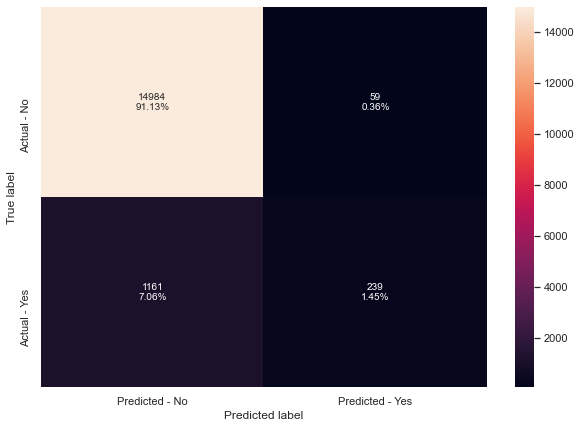

In [289]:
# Calculating different metrics
get_metrics_score(bagg_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

#### RandomizedSearchCV

In [290]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 40, 'baggingclassifier__max_samples': 0.7, 'baggingclassifier__max_features': 0.7} with CV score=0.9188061784792998:
CPU times: user 8min 26s, sys: 15.5 s, total: 8min 41s
Wall time: 8min 45s


In [291]:
# Creating new pipeline with best parameters
bagg_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.7,
        random_state=1,
        max_samples=0.7,
        n_estimators=40
    ),
)

# Fit the model on training data
bagg_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.7, max_samples=0.7,
                                   n_estimators=40, random_state=1))])

Accuracy on training set :  0.9844128763195621
Accuracy on test set :  0.9284802043422733
Recall on training set :  0.8170134638922889
Recall on test set :  0.18
Precision on training set :  1.0
Precision on test set :  0.9


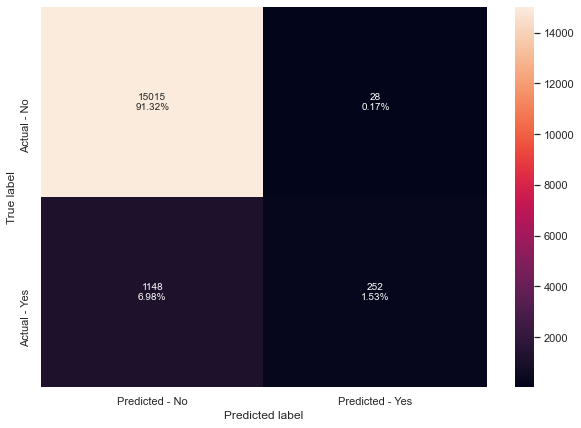

In [292]:
# Calculating different metrics
get_metrics_score(bagg_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bagg_tuned2, y_test)

- The precision has increased but it is overfitting on testing data.

### Hyperparameter tuning Random Forest

#### GridSearchCV

In [293]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_samples': 0.2, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 100} 
Score: 0.9441086006418976
CPU times: user 26min 2s, sys: 34.9 s, total: 26min 37s
Wall time: 26min 45s


In [296]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=100,
        max_features='log2',
        random_state=1,
        max_samples=0.2,
        min_samples_leaf=3
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='log2', max_samples=0.2,
                                        min_samples_leaf=3, random_state=1))])

Accuracy on training set :  0.9245405968982146
Accuracy on test set :  0.9239189928845101
Recall on training set :  0.12025703794369645
Recall on test set :  0.11714285714285715
Precision on training set :  0.9515738498789347
Precision on test set :  0.9162011173184358


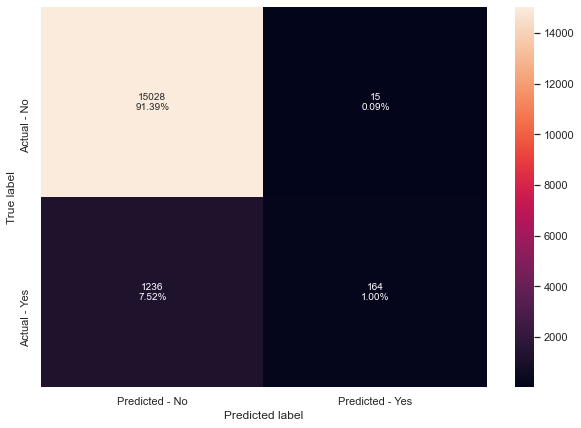

In [297]:
# Calculating different metrics
get_metrics_score(rf_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

- Precision score is good for both test and train data
- model is not overfitting wrt the precision score.

#### RandomizedSearchCV


In [298]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 150, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__max_samples': 0.2, 'randomforestclassifier__max_features': 'log2'} with CV score=0.9360305342000788:
CPU times: user 6min 25s, sys: 8.89 s, total: 6min 34s
Wall time: 6min 35s


In [299]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=150,
        max_features='log2',
        random_state=1,
        max_samples=0.2,
        min_samples_leaf=3
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='log2', max_samples=0.2,
                                        min_samples_leaf=3, n_estimators=150,
                                        random_state=1))])

Accuracy on training set :  0.924488466049785
Accuracy on test set :  0.9239189928845101
Recall on training set :  0.12025703794369645
Recall on test set :  0.11714285714285715
Precision on training set :  0.946987951807229
Precision on test set :  0.9162011173184358


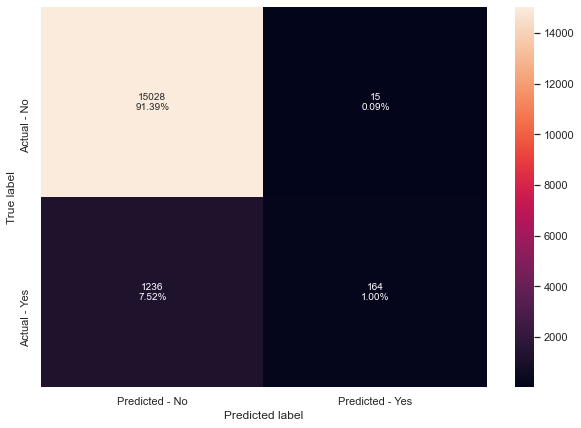

In [300]:
# Calculating different metrics
get_metrics_score(rf_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

In [ ]:
- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from random search are exactly same as compared grid search except n_estimators.
- The model is overfitting the data for parameters given by random search.

### Hyperparameter tuning AdaBoost

#### GridSearchCV

In [301]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 100} 
Score: 0.2955898675133821
CPU times: user 26min 16s, sys: 1min 9s, total: 27min 25s
Wall time: 27min 39s


In [302]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9384334680046917
Accuracy on test set :  0.9285410204950435
Recall on training set :  0.35526315789473684
Recall on test set :  0.295
Precision on training set :  0.8199152542372882
Precision on test set :  0.6871880199667221


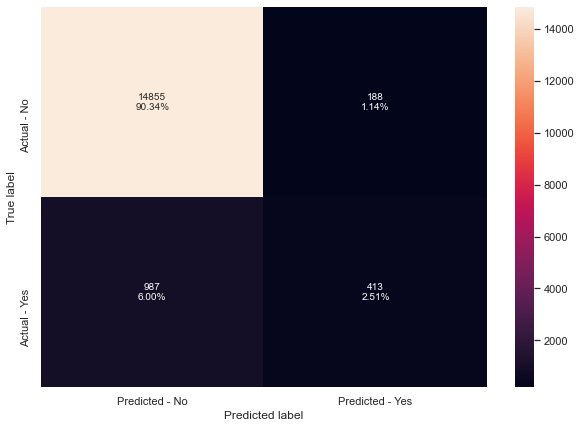

In [303]:
# Calculating different metrics
get_metrics_score(abc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- Precision score has gone down compared to other models.

#### RandomizedSearchCV

In [304]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 40, 'adaboostclassifier__learning_rate': 0.05, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:
CPU times: user 14min 32s, sys: 35.9 s, total: 15min 8s
Wall time: 15min 22s


In [305]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
        n_estimators=40,
        learning_rate=0.05,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                          random_state=1),
                                    learning_rate=0.05, n_estimators=40,
                                    random_state=1))])

Accuracy on training set :  0.9175029323602242
Accuracy on test set :  0.917290032232561
Recall on training set :  0.031517747858017135
Recall on test set :  0.02857142857142857
Precision on training set :  1.0
Precision on test set :  1.0


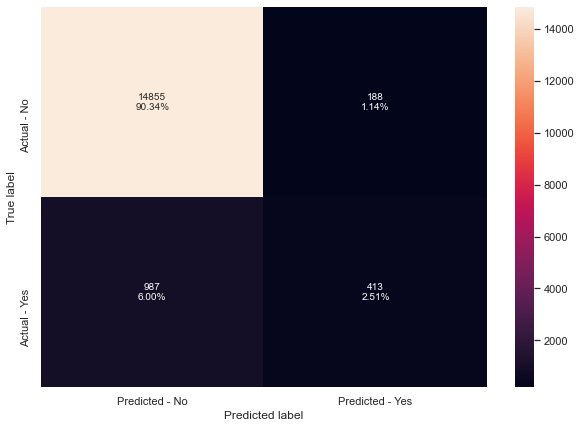

In [306]:
# Calculating different metrics
get_metrics_score(abc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- Model is overfitting

### Hyperparameter tuning GradientBoosting

#### GridSearchCV

In [307]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__init': AdaBoostClassifier(random_state=1), 'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_features': 1, 'gradientboostingclassifier__n_estimators': 75, 'gradientboostingclassifier__subsample': 1} 
Score: 1.0
CPU times: user 53min 51s, sys: 1min 19s, total: 55min 11s
Wall time: 55min 28s


In [308]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        learning_rate=0.1,
        max_features=1,
        n_estimators=75,
        subsample=1,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=1, n_estimators=75,
                                            random_state=1, subsample=1))])

Accuracy on training set :  0.9156001563925453
Accuracy on test set :  0.915587179954996
Recall on training set :  0.009179926560587515
Recall on test set :  0.008571428571428572
Precision on training set :  1.0
Precision on test set :  1.0


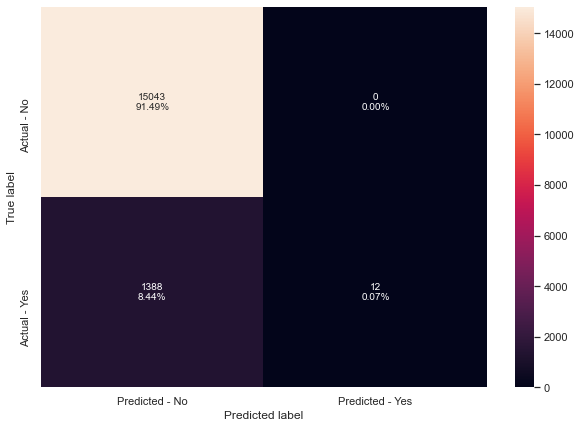

In [309]:
# Calculating different metrics
get_metrics_score(gbc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

- The model is overfitting

#### RandomizedSearchCV

In [310]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.5, 'gradientboostingclassifier__n_estimators': 125, 'gradientboostingclassifier__max_features': 1, 'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__init': AdaBoostClassifier(random_state=1)} with CV score=1.0:
CPU times: user 10min 26s, sys: 15.9 s, total: 10min 41s
Wall time: 10min 48s


In [311]:
# Creating new pipeline with best parameters
gbc_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        learning_rate=0.05,
        max_features=1,
        n_estimators=125,
        subsample=0.5,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            learning_rate=0.05, max_features=1,
                                            n_estimators=125, random_state=1,
                                            subsample=0.5))])

Accuracy on training set :  0.9154437638472566
Accuracy on test set :  0.9154047314966856
Recall on training set :  0.0073439412484700125
Recall on test set :  0.0064285714285714285
Precision on training set :  1.0
Precision on test set :  1.0


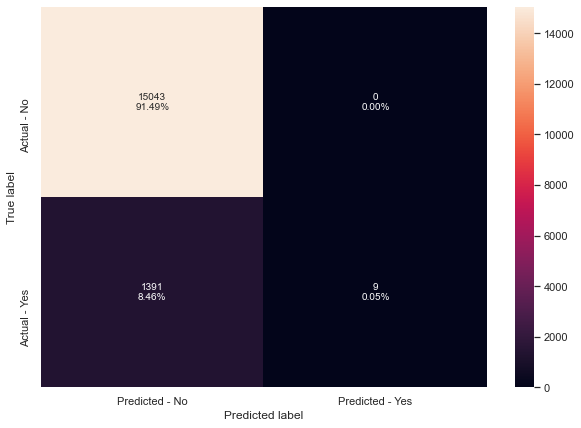

In [312]:
# Calculating different metrics
get_metrics_score(gbc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

- Model is overfitting

### Hyperparameter tuning XGBoost

#### GridSearchCV

In [313]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

KeyboardInterrupt: 

In [314]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=1,
        learning_rate=0.01,
        gamma=3,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.849081193796429
Accuracy on test set :  0.8446755458249711
Recall on training set :  0.5269277845777234
Recall on test set :  0.5
Precision on training set :  0.2886356017432115
Precision on test set :  0.274079874706343


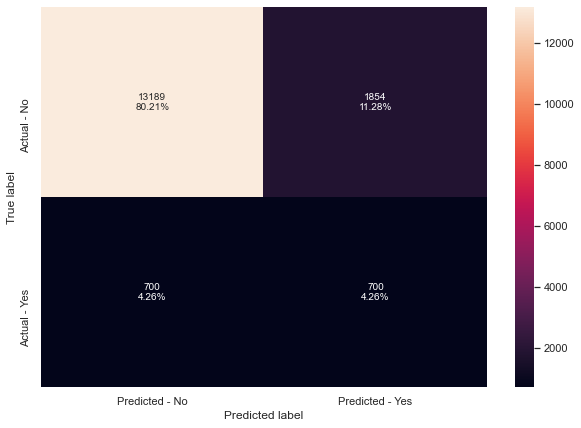

In [316]:
# Calculating different metrics
get_metrics_score(xgb_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

#### RandomizedSearchCV

In [317]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 1, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0} with CV score=0.865548719558002:
CPU times: user 1h 26min 38s, sys: 43.5 s, total: 1h 27min 21s
Wall time: 12min 1s


In [318]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                learning_rate=0.05,
                gamma=5,
                subsample=1,
                eval_metric='logloss',
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8505929884008863
Accuracy on test set :  0.8465608465608465
Recall on training set :  0.5801713586291309
Recall on test set :  0.5664285714285714
Precision on training set :  0.3030690537084399
Precision on test set :  0.2927279438907346


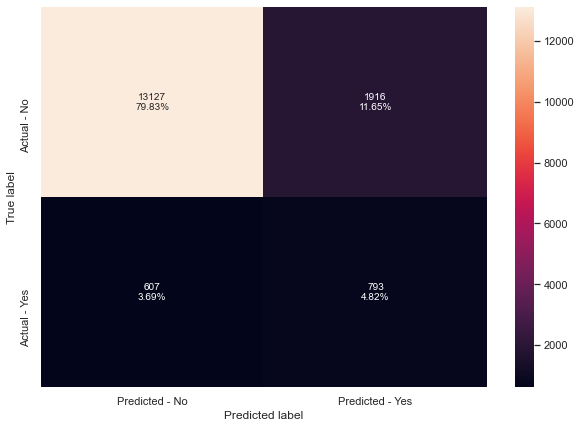

In [319]:
# Calculating different metrics
get_metrics_score(xgb_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- precision score on XGBoost is very low.

In [321]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [322]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [323]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [324]:
# defining list of models
models = [dtree_tuned1,dtree_tuned2,bagg_tuned1,bagg_tuned2,rf_tuned1,rf_tuned2,abc_tuned1,abc_tuned2,gbc_tuned1,gbc_tuned2,xgb_tuned1, xgb_tuned2]


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [325]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            'Logistic Regression on Oversampled data',
            'Logistic Regression-Regularized (Oversampled data)',
            'Logistic Regression on Undersampled data',
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "Bagging Classifier with GridSearchCV",
            "Bagging Classifier with RandomizedSearchCV",
            "Random Forest with GridSearchCV",
            "Random Forest with RandomizedSearchCV",
            "AdaBoost with GridSearchCV",
            "AdaBoost Tree with RandomizedSearchCV",
            "GradientBoost with GridSearchCV",
            "GradientBoost Tree with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.927877,0.928602,0.207466,0.221429,0.792982,0.786802
1,Logistic Regression on Oversampled data,0.787945,0.762270,0.779297,0.342143,0.793012,0.138160
2,Logistic Regression-Regularized (Oversampled d...,0.546015,0.420544,0.705986,0.698571,0.534862,0.096985
3,Logistic Regression on Undersampled data,0.639229,0.625555,0.675643,0.682857,0.629778,0.143350
4,Decision Tree with GridSearchCV,0.926652,0.925804,0.176255,0.170714,0.825215,0.802013
5,Decision Tree with RandomizedSearchCV,0.922820,0.922763,0.108629,0.109286,0.880893,0.869318
6,Bagging Classifier with GridSearchCV,0.985612,0.928237,0.831089,0.175000,1.000000,0.907407
7,Bagging Classifier with RandomizedSearchCV,0.984413,0.928480,0.817013,0.180000,1.000000,0.900000
8,Random Forest with GridSearchCV,0.924541,0.923919,0.120257,0.117143,0.951574,0.916201
9,Random Forest with RandomizedSearchCV,0.924488,0.923919,0.120257,0.117143,0.946988,0.916201


#### Random Forest with RandomizedSearchCV gives the best Precision scores without overfitting too much

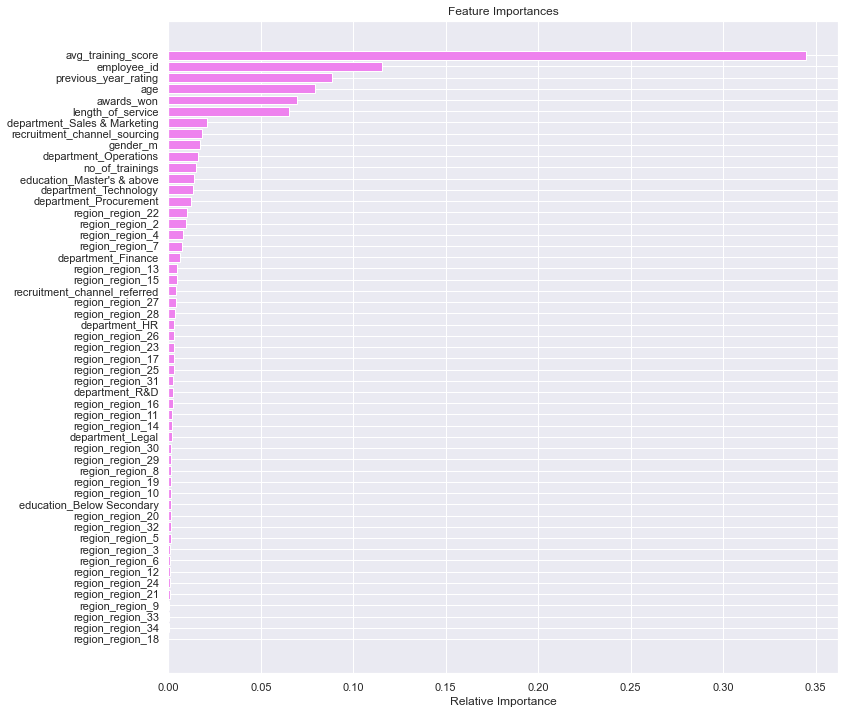

In [329]:
feature_names = X_train.columns
importances = rf_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total_Trans_Ct is the most important variable in predicting credit card churn followed by Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count, Total_Ct_Chng_Q4_Q1 and Martial_Status.